In [51]:
#Recency Calculation
#create a generic user dataframe to keep CustomerID and new segmentation scores
user = pd.DataFrame(df['CustomerID'].unique())
user.columns = ['CustomerID']

#get the max purchase date for each customer and create a dataframe with it
max_purchase = uk.groupby('CustomerID').InvoiceDate.max().reset_index()
max_purchase.columns = ['CustomerID','MaxPurchaseDate']

#we take our observation point as the max invoice date in our dataset
max_purchase['Recency'] = (max_purchase['MaxPurchaseDate'].max() - max_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
user = pd.merge(user, max_purchase[['CustomerID','Recency']], on='CustomerID')

user.head()

,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,13748.0,95
3,15100.0,329
4,15291.0,25


In [52]:
#plot a recency histogram

plot_data = [
    go.Histogram(
        x=user['Recency']
    )
]

plot_layout = go.Layout(
        title='Recency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

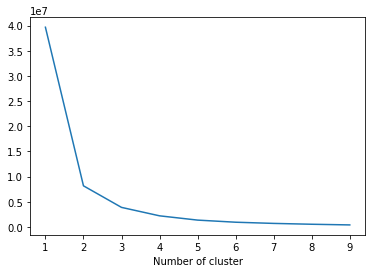

In [54]:
from sklearn.cluster import KMeans

sse={}
recency = user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(recency)
    recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [62]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(user[['Recency']])
user['RecencyCluster'] = kmeans.predict(user[['Recency']])
#3 covers most recent customers whereas 0 has the most inactive ones.

In [63]:
user

,CustomerID,Recency,RecencyCluster
0,17850.0,301,1
1,15100.0,329,1
2,18074.0,373,1
3,16250.0,260,1
4,13747.0,373,1
5,17908.0,373,1
6,16583.0,373,1
7,18085.0,329,1
8,17968.0,373,1
9,14729.0,373,1


In [64]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

user = order_cluster('RecencyCluster', 'Recency',user,False)

In [65]:
user

,CustomerID,Recency,RecencyCluster
0,17850.0,301,0
1,15100.0,329,0
2,18074.0,373,0
3,16250.0,260,0
4,13747.0,373,0
5,17908.0,373,0
6,16583.0,373,0
7,18085.0,329,0
8,17968.0,373,0
9,14729.0,373,0


In [66]:
#Frequency Calculation
#get order counts for each user and create a dataframe with it
frequency = uk.groupby('CustomerID').InvoiceDate.count().reset_index()
frequency.columns = ['CustomerID','Frequency']

#add this data to our main dataframe
user = pd.merge(user, frequency, on='CustomerID')
user

,CustomerID,Recency,RecencyCluster,Frequency
0,17850.0,301,0,312
1,15100.0,329,0,6
2,18074.0,373,0,13
3,16250.0,260,0,24
4,13747.0,373,0,1
5,17908.0,373,0,58
6,16583.0,373,0,14
7,18085.0,329,0,29
8,17968.0,373,0,85
9,14729.0,373,0,71


In [67]:
#plot the histogram
plot_data = [
    go.Histogram(
        x=user.query('Frequency < 1000')['Frequency']
    )
]

plot_layout = go.Layout(
        title='Frequency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [69]:
#k-means
#As the same notation as recency clusters, high frequency number indicates better customers.
kmeans = KMeans(n_clusters=4)
kmeans.fit(user[['Frequency']])
user['FrequencyCluster'] = kmeans.predict(user[['Frequency']])

#order the frequency cluster
user = order_cluster('FrequencyCluster', 'Frequency',user,True)

#see details of each cluster
user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3496.0,49.525744,44.954212,1.0,15.0,33.0,73.0,190.0
1,429.0,331.221445,133.856510,191.0,228.0,287.0,399.0,803.0
2,22.0,1313.136364,505.934524,872.0,988.5,1140.0,1452.0,2782.0
3,3.0,5917.666667,1805.062418,4642.0,4885.0,5128.0,6555.5,7983.0


In [70]:
#Revenue or Monetary
#calculate revenue for each customer
uk['Revenue'] = uk['UnitPrice'] * uk['Quantity']
revenue = uk.groupby('CustomerID').Revenue.sum().reset_index()

#merge it with our main dataframe
user = pd.merge(user, revenue, on='CustomerID')
user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,17850.0,301,0,312,1,5288.63
1,15808.0,305,0,210,1,3724.77
2,13047.0,31,3,196,1,3079.10
3,14688.0,7,3,359,1,5107.38
4,16029.0,38,3,274,1,50992.61
5,13408.0,1,3,501,1,27487.41
6,13767.0,1,3,399,1,16945.71
7,13448.0,16,3,199,1,3465.67
8,15513.0,30,3,314,1,14520.08
9,17920.0,3,3,696,1,4204.10


In [71]:
#plot the histogram
plot_data = [
    go.Histogram(
        x=user.query('Revenue < 10000')['Revenue']
    )
]

plot_layout = go.Layout(
        title='Monetary Value'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [72]:
#apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(user[['Revenue']])
user['RevenueCluster'] = kmeans.predict(user[['Revenue']])


#order the cluster numbers
user = order_cluster('RevenueCluster', 'Revenue',user,True)

#show details of the dataframe
user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3687.0,907.254414,921.910820,-4287.63,263.115,572.56,1258.220,4314.72
1,234.0,7760.699530,3637.173671,4330.67,5161.485,6549.38,9142.305,21535.90
2,27.0,43070.445185,15939.249588,25748.35,28865.490,36351.42,53489.790,88125.38
3,2.0,221960.330000,48759.481478,187482.17,204721.250,221960.33,239199.410,256438.49


In [76]:
#Overall Score (RFM)
#calculate overall score and use mean() to see details
#0 to 2: Low Value
#3 to 4: Mid Value
#5+: High Value
user['OverallScore'] = user['RecencyCluster'] + user['FrequencyCluster'] + user['RevenueCluster']
user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()
user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore
0,17850.0,301,0,312,1,5288.63,1,2
1,14688.0,7,3,359,1,5107.38,1,5
2,13767.0,1,3,399,1,16945.71,1,5
3,15513.0,30,3,314,1,14520.08,1,5
4,14849.0,21,3,392,1,7904.28,1,5
5,12921.0,3,3,741,1,16389.74,1,5
6,13468.0,1,3,306,1,5656.75,1,5
7,17690.0,29,3,258,1,4748.45,1,5
8,17017.0,2,3,268,1,8574.11,1,5
9,15601.0,10,3,414,1,6745.36,1,5


In [77]:
user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,304.584388,21.995781,303.339705
1,185.362989,32.596085,498.087546
2,78.991304,46.963043,868.082991
3,20.689610,68.419590,1091.416414
4,14.892617,271.755034,3607.097114
5,9.662162,373.290541,9136.946014
6,7.740741,876.037037,22777.914815
7,1.857143,1272.714286,103954.025714
8,1.333333,5917.666667,42177.930000


In [78]:
user['Segment'] = 'Low-Value'
user.loc[user['OverallScore']>2,'Segment'] = 'Mid-Value' 
user.loc[user['OverallScore']>4,'Segment'] = 'High-Value' 


In [79]:
#Revenue vs Frequency
graph = user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=graph.query("Segment == 'Low-Value'")['Frequency'],
        y=graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=graph.query("Segment == 'Mid-Value'")['Frequency'],
        y=graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=graph.query("Segment == 'High-Value'")['Frequency'],
        y=graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [80]:
#Revenue Recency

graph = user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=graph.query("Segment == 'Low-Value'")['Recency'],
        y=graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=graph.query("Segment == 'Mid-Value'")['Recency'],
        y=graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=graph.query("Segment == 'High-Value'")['Recency'],
        y=graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


In [82]:
# Frequency vs Recency
graph = user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=graph.query("Segment == 'Low-Value'")['Recency'],
        y=graph.query("Segment == 'Low-Value'")['Frequency'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=graph.query("Segment == 'Mid-Value'")['Recency'],
        y=graph.query("Segment == 'Mid-Value'")['Frequency'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=graph.query("Segment == 'High-Value'")['Recency'],
        y=graph.query("Segment == 'High-Value'")['Frequency'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
#High Value: Improve Retention
#Mid Value: Improve Retention + Increase Frequency
#Low Value: Increase Frequency